<a href="https://colab.research.google.com/github/Ganesh-Borkar/CSLab/blob/main/cslab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [8]:
iris=pd.read_csv("/content/iris.csv")

In [9]:
iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


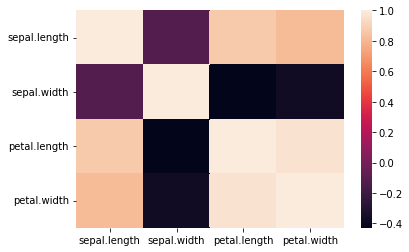

In [13]:
sns.heatmap(iris.corr())

In [16]:
pca = PCA()
x_new1 =pca.fit_transform(iris.drop(["variety"],axis =1))
x_new1[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [17]:
explained_variance= pca.explained_variance_ratio_

explained_variance

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

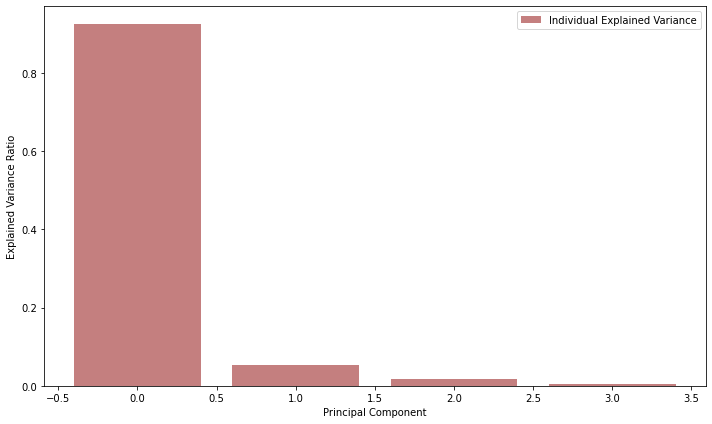

In [20]:
plt.figure(figsize =(10,6))
plt.bar(range(4),explained_variance, alpha=0.5, align='center', label ="Individual Explained Variance", color ="darkred")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.legend(loc ="best")
plt.tight_layout()

In [21]:
pca  = PCA(n_components=3)
x_new =pca.fit_transform(iris.drop(['variety'],axis =1))
x_new[:5]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

In [25]:
categ_num ={"variety":{"setosa":0,"versicolor":1,"virginica":2}}
iris1 = iris.replace(categ_num)
columns = list(iris.columns[:4])

ValueError: ignored

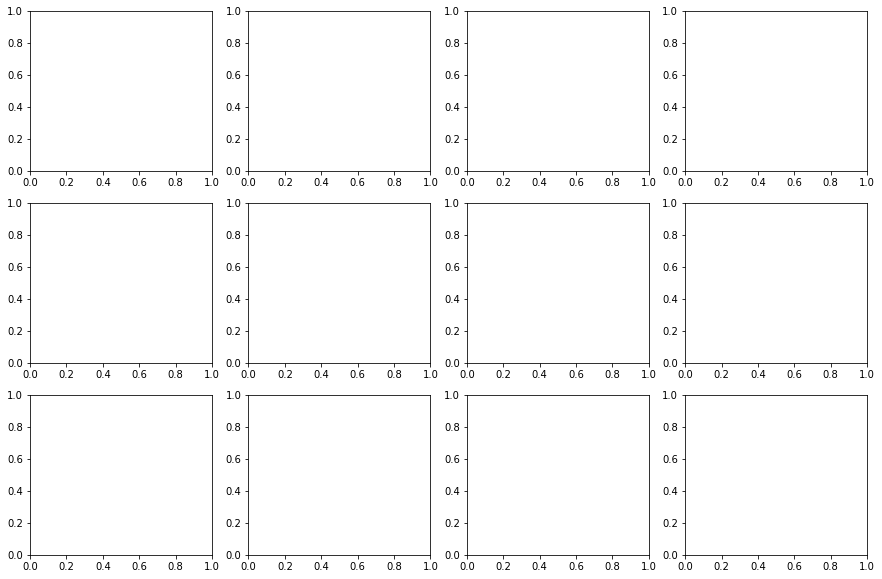

In [26]:
fig, axes =plt.subplots(3,4,figsize =(15,10))
k= 0
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i,j].scatter(x_new[:,i],iris[columns[j]],c =iris1["variety"])
plt.show()